# THE SPARKS FOUNDATION #GRIPJUNE23

 ## By Birendra Mandal,  DATA SCIENCE & BUSINESS ANALYTICS INTERN

# TASK-1 Prediction using Supervised ML

Perform exploratory Data Analysis on dataset 'Student' to predict the percentage of marks of the students based on the number of hours they studied.
Dataset Sample:http://bit.ly/w-data

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 

In [2]:
# Reading the Data
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Check if there any null value in the Dataset
data.isnull == True

False

# CONCLUSION- There is no null value in the Dataset so,now we can visualize our Data

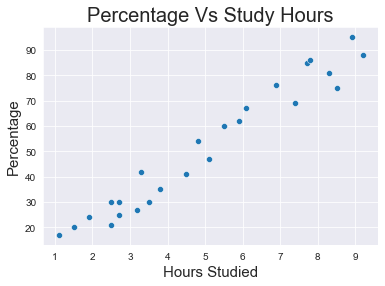

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x=data['Hours'])
plt.title('Percentage Vs Study Hours', size = 20)
plt.ylabel('Percentage',size = 15)
plt.xlabel('Hours Studied', size = 15)
plt.show()

# OBSERVATION - The above data scatter plot there looks to be LINEAR correlation between the 'Percentage' and 'Hours Studied'.
# Plotting a regression line to confirm the correlation .

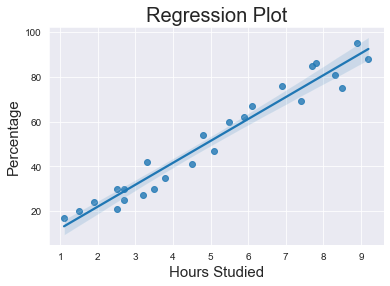

In [6]:
sns.regplot(x=data['Hours'], y= data['Scores'])
plt.title('Regression Plot' , size=20)
plt.ylabel('Percentage', size =15)
plt.xlabel('Hours Studied' , size =15)
plt.show()

In [7]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# Correlation shows that the variables are positively correlated.


# Training the Model

# 1.Spliting the Data

In [25]:
#Defining X and y from the Data
X = data.iloc[: , :-1].values
y =data.iloc[:, 1].values

#Spliting the Data in two
train_X, test_X , train_y,test_y = train_test_split(X,y,random_state = 42)

# 2.Fitting the Data into the model

In [26]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

# Predicting the Percentage of Marks

In [27]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X],'Predicted Marks':[k for k in pred_y]})
prediction 

,Hours,Predicted Marks
0,8.3,83.107332
1,2.5,26.765598
2,2.5,26.765598
3,6.9,69.507603
4,5.9,59.793511
5,2.7,28.708416
6,3.3,34.536871


# Comparing the Predicted Marks with the Actual Marks

In [28]:
compare_marks = pd.DataFrame({'Actual Marks':test_y,'Predicted Marks ': pred_y})
compare_marks

,Actual Marks,Predicted Marks
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511
5,25,28.708416
6,42,34.536871


# Viarsually Comparing The Predicted Marks with the Actual Marks

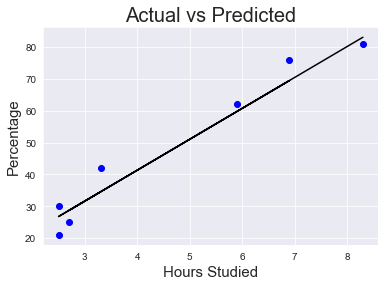

In [29]:
plt.scatter(x=test_X, y=test_y, color = 'blue')
plt.plot(test_X, pred_y, color ='Black')
plt.title('Actual vs Predicted' , size = 20)
plt.ylabel('Percentage' , size =15)
plt.xlabel('Hours Studied', size =15)
plt.show()

# Evaluating the Model 

In [31]:
# Calculatig the accuracy of the model
print('Mean absolute error : ',mean_absolute_error(test_y,pred_y))

Mean absolute error :  4.425394675156182


# Small value of Mean absolute error states that the chances of error are very less

# What will be the predicted score of a student if he or she studies for 9.25hrs/day ?

In [32]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.336


# According to the regression model if a student studies for 9.25 hours a day he or she is likely to score 92.34 marks.